In [10]:
#pip install sklearn

#pip install statsmodels
#!pip install --upgrade pandas


     |████████████████████████████████| 11.8 MB 15.9 MB/s            
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
You should consider upgrading via the '/Users/louisalu/Documents/WSP_PUBLIC/venv/bin/python -m pip install --upgrade pip' command.


## Linear regression

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

**Check out the Data**

In [45]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [46]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [47]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [48]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [49]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

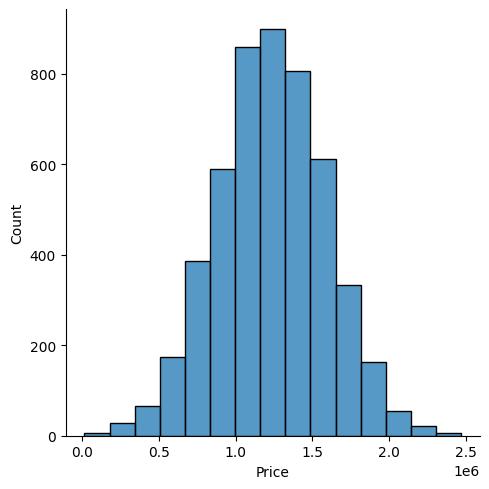

In [50]:
sns.displot(USAhousing['Price'], bins=15)

<AxesSubplot:>

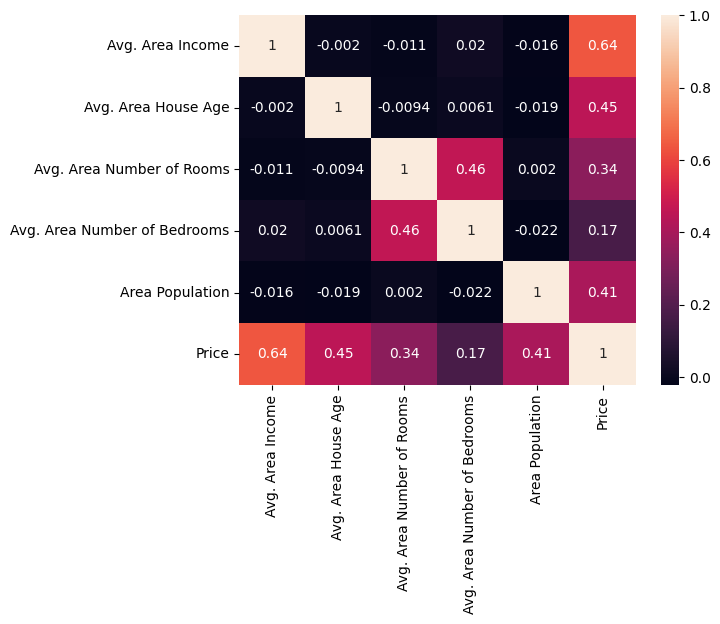

In [51]:
sns.heatmap(USAhousing.corr(),annot=True)
#sns.heatmap(USAhousing.corr(numeric_only=True),annot=True)

#!pip install --upgrade pandas if you have an error

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [52]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [55]:
from sklearn.linear_model import LinearRegression


In [56]:
lm = LinearRegression()

In [57]:
lm_result=lm.fit(X_train,y_train)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [58]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [59]:
coeff_df = pd.DataFrame(lm.coef_,X.columns)
coeff_df

,0
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## P-value

In [60]:
#!pip install statsmodels

In [61]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

#Kurtosis: fatness of the tail (<3: short tail)
#durbin-watson: test of autocorrelations (<2, position correlation; >
#2 negative autocorrelation)
#jarque-bera: goodness of fit test. 
#(the farther from 0, the more unlikely that it is normal distribution)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     6715.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:22:50   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.763e+04
Df Residuals:                    2994   BIC:                         7.766e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [62]:
predictions = lm.predict(X_test)

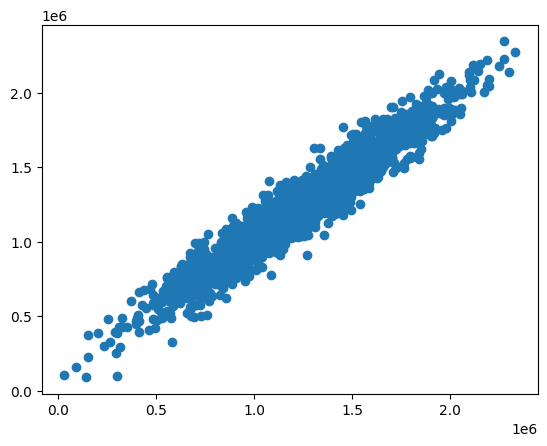

In [63]:
plt.scatter(y_test,predictions)

**Residual Histogram**

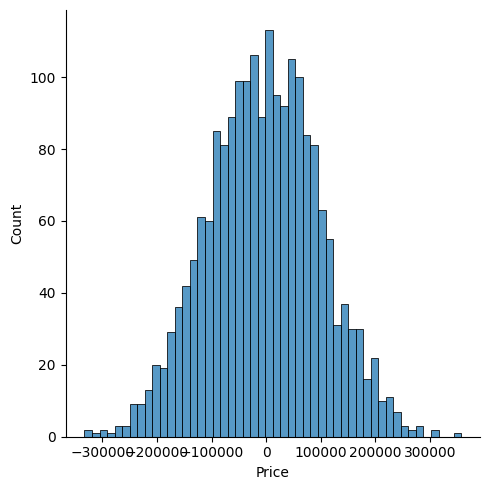

In [64]:
sns.displot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [65]:
from sklearn import metrics

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914951
MSE: 10460958907.20899
RMSE: 102278.82922290903


lets do some exercise of linear regression

# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [25]:
pip install xgboost

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [68]:
df = pd.read_csv('kyphosis.csv')

In [69]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

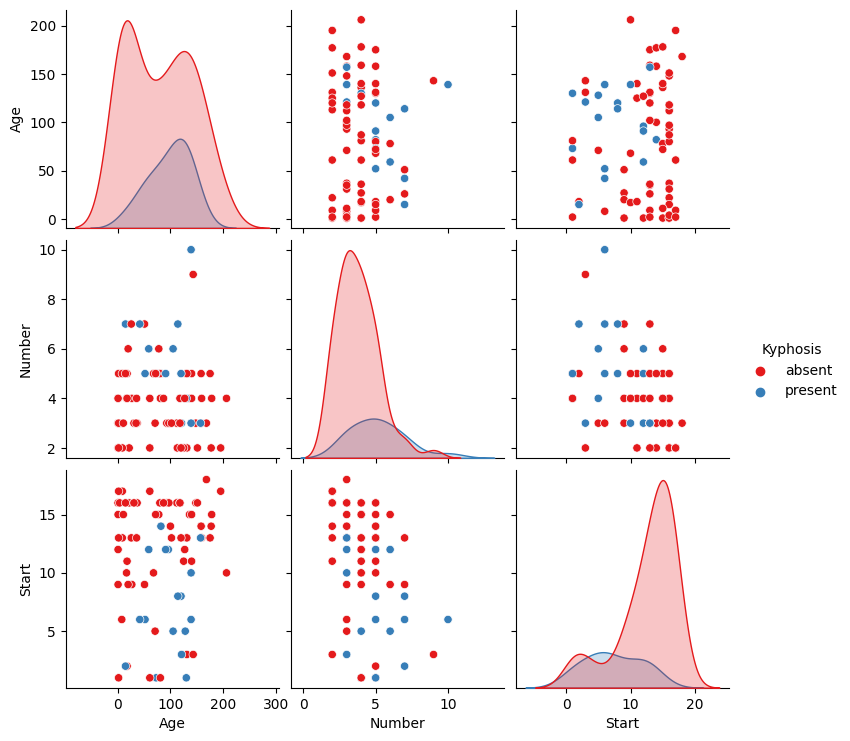

In [70]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [77]:
predictions = dtree.predict(X_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix


In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.85      0.89      0.87        19
     present       0.60      0.50      0.55         6

    accuracy                           0.80        25
   macro avg       0.72      0.70      0.71        25
weighted avg       0.79      0.80      0.79        25



In [80]:
print(confusion_matrix(y_test,predictions))

[[17  2]
 [ 3  3]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) 
#number of trees in the classifer
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
rfc_pred = rfc.predict(X_test)

In [81]:
print(confusion_matrix(y_test,rfc_pred))

[[15  4]
 [ 6  0]]


In [82]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.71      0.79      0.75        19
     present       0.00      0.00      0.00         6

    accuracy                           0.60        25
   macro avg       0.36      0.39      0.38        25
weighted avg       0.54      0.60      0.57        25



# XGBoost

In [83]:
import xgboost as xgb


In [84]:
xgb_cl = xgb.XGBClassifier()

y_train=y_train.astype('category').cat.codes
y_test=y_test.astype('category').cat.codes

y_train.head(5)


0     0
11    0
13    0
23    0
44    0
dtype: int8

In [57]:
xgb_cl.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
preds = xgb_cl.predict(X_test)

In [59]:
print(confusion_matrix(y_test,preds))


[[19  0]
 [ 4  2]]


In [60]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25



## hypertuning

In [85]:
xgb_cl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Commonly used parameters:
1. learning_rate: also called eta, it specifies how quickly the model fits the residual errors by using additional base learners. this is to prevent overfitting
2. gamma: Minimum loss reduction required to make a further partition on a leaf node.
3. alpha: L1 regularization term on weights.
4. lamdaL l2 regularization terms on weight


3. max_depth - how deep the tree's decision nodes can go. Must be a positive integer
4. subsample - fraction of the training set that can be used to train each tree. If this value is low, it may lead to underfitting or if it is too high, it may lead to overfitting
5. colsample_bytree -- fraction of the features that can be used to train each tree. A large value means almost all features can be used to build the decision tree




In [129]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5], #alpha
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}


In [130]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search, 
# n_jobs=-1 using all the process to run at the same time
#cross-validation: 5 fold by default
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")


In [131]:
grid_cv.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [132]:
grid_cv.best_score_

0.6898148148148148

In [133]:
grid_cv.best_params_




{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [103]:
"""
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5], #alpha
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
"""

'\nparam_grid = {\n    "max_depth": [3, 4, 5, 7],\n    "learning_rate": [0.1, 0.01, 0.05],\n    "gamma": [0, 0.25, 1],\n    "reg_lambda": [0, 1, 10],\n    "scale_pos_weight": [1, 3, 5], #alpha\n    "subsample": [0.8],\n    "colsample_bytree": [0.5],\n}\n'

everything is on the edge except learning rate, so we have to keep working~

In [105]:
#first insert the new value
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]
param_grid["learning_rate"] = [0.01]


#new iterations
param_grid["max_depth"] = [1,2,3, 4, 5]
param_grid["scale_pos_weight"]=[0, 0.5, 1]
param_grid["gamma"] = [0, 0.1, 0.2]
param_grid["reg_lambda"] = [10, 15, 20]

param_grid

{'max_depth': [1, 2, 3, 4, 5],
 'learning_rate': [0.01],
 'gamma': [0, 0.1, 0.2],
 'reg_lambda': [10, 15, 20],
 'scale_pos_weight': [0, 0.5, 1],
 'subsample': [0.8],
 'colsample_bytree': [0.5]}

In [107]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="roc_auc", n_jobs=-1)


In [108]:
grid_cv_2.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01], 'max_depth': [1, 2, 3, 4, 5],
                         'reg_lambda': [10, 15, 20],
                         'scale_pos_weight': [0, 0.5, 1], 'subsample': [0.8]},
             scoring='roc_auc')

In [109]:
grid_cv_2.best_score_

0.6898148148148148

In [110]:
grid_cv_2.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 1,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
{'max_depth': [1, 2, 3, 4, 5],
 'learning_rate': [0.01],
 'gamma': [0, 0.1, 0.2],
 'reg_lambda': [10, 15, 20],
 'scale_pos_weight': [0, 0.5, 1],
 'subsample': [0.8],
 'colsample_bytree': [0.5]}

In [111]:
#first insert the new value
param_grid["max_depth"] = [1, 2, 3, 4, 5]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]
param_grid["reg_lambda"] = [10]

#new iterations
param_grid["gamma"] = [1,2,3]
param_grid["learning_rate"] = [0.1, 0.2, 0.3]
param_grid["scale_pos_weight"]=[1,2,3]



In [112]:
grid_cv_3 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="roc_auc", n_jobs=-1)


In [113]:
grid_cv_3.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [1, 2, 3],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4, 5], 'reg_lambda': [10],
                         'scale_pos_weight': [1, 2, 3], 'subsample': [0.8]},
             scoring='roc_auc')

In [114]:
grid_cv_3.best_score_  

# It tells you how well the best model from the grid search performs on the given data, 
#based on the evaluation metric, 
#but it doesn't say anything about how this model will perform on unseen data 
#or how it compares to other types of models.

0.6425925925925926

In [115]:
grid_cv_3.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 1,
 'reg_lambda': 10,
 'scale_pos_weight': 2,
 'subsample': 0.8}

In [119]:
#grid2 is the best

In [126]:
preds = grid_cv.predict(X_test)

In [127]:
print(confusion_matrix(y_test,preds))

[[19  0]
 [ 6  0]]


In [128]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       0.00      0.00      0.00         6

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


lets do some exercise

## lets do capston projects

In [87]:
import pandas as pd

In [88]:
df_news=pd.read_csv("Combined_News_DJIA.csv")

In [83]:
df_news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [89]:
type(df_news['Date'].iloc[0])

str

In [90]:
df_news['Date']=pd.to_datetime(df_news['Date'])

In [91]:
type(df_news['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [93]:
#getting DJIA data
df_price=pd.read_csv("DJIA-price.csv", thousands=r',')

In [94]:
df_price.head(5)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jul 05, 2023",34344.72,34376.11,34226.98,34288.64,34288.64,274570000.0
1,"Jul 03, 2023",34369.78,34465.60,34286.54,34418.47,34418.47,157590000.0
2,"Jun 30, 2023",34269.92,34467.35,34269.92,34407.60,34407.60,351060000.0
3,"Jun 29, 2023",33854.57,34147.68,33828.63,34122.42,34122.42,279940000.0
4,"Jun 28, 2023",33881.38,33903.76,33755.92,33852.66,33852.66,268050000.0


In [95]:
df_price['Date']=pd.to_datetime(df_price['Date'])

In [96]:
df_price['Date'][0:10]

0   2023-07-05
1   2023-07-03
2   2023-06-30
3   2023-06-29
4   2023-06-28
5   2023-06-27
6   2023-06-26
7   2023-06-23
8   2023-06-22
9   2023-06-21
Name: Date, dtype: datetime64[ns]

In [97]:
df_price.sort_values(by='Date', inplace=True)
df_price

,Date,Open,High,Low,Close*,Adj Close**,Volume
3774,2008-07-07,11289.19,11399.11,11120.74,11231.96,11231.96,248240000.0
3773,2008-07-08,11225.03,11391.13,11174.88,11384.21,11384.21,271500000.0
3772,2008-07-09,11381.93,11418.24,11141.99,11147.44,11147.44,227100000.0
3771,2008-07-10,11148.01,11270.30,11086.95,11229.02,11229.02,248010000.0
3770,2008-07-11,11226.17,11241.07,10977.68,11100.54,11100.54,275010000.0
...,...,...,...,...,...,...,...
4,2023-06-28,33881.38,33903.76,33755.92,33852.66,33852.66,268050000.0
3,2023-06-29,33854.57,34147.68,33828.63,34122.42,34122.42,279940000.0
2,2023-06-30,34269.92,34467.35,34269.92,34407.60,34407.60,351060000.0
1,2023-07-03,34369.78,34465.60,34286.54,34418.47,34418.47,157590000.0


In [98]:
df_price=df_price.reset_index(drop=True)
df_price

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2008-07-07,11289.19,11399.11,11120.74,11231.96,11231.96,248240000.0
1,2008-07-08,11225.03,11391.13,11174.88,11384.21,11384.21,271500000.0
2,2008-07-09,11381.93,11418.24,11141.99,11147.44,11147.44,227100000.0
3,2008-07-10,11148.01,11270.30,11086.95,11229.02,11229.02,248010000.0
4,2008-07-11,11226.17,11241.07,10977.68,11100.54,11100.54,275010000.0
...,...,...,...,...,...,...,...
3770,2023-06-28,33881.38,33903.76,33755.92,33852.66,33852.66,268050000.0
3771,2023-06-29,33854.57,34147.68,33828.63,34122.42,34122.42,279940000.0
3772,2023-06-30,34269.92,34467.35,34269.92,34407.60,34407.60,351060000.0
3773,2023-07-03,34369.78,34465.60,34286.54,34418.47,34418.47,157590000.0


In [99]:
#lets add percentage
df_price['percentage']=df_price["Adj Close**"].pct_change()
df_price.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage
0,2008-07-07,11289.19,11399.11,11120.74,11231.96,11231.96,248240000.0,NaN
1,2008-07-08,11225.03,11391.13,11174.88,11384.21,11384.21,271500000.0,0.013555
2,2008-07-09,11381.93,11418.24,11141.99,11147.44,11147.44,227100000.0,-0.020798
3,2008-07-10,11148.01,11270.30,11086.95,11229.02,11229.02,248010000.0,0.007318
4,2008-07-11,11226.17,11241.07,10977.68,11100.54,11100.54,275010000.0,-0.011442


In [100]:
#let's find rolling standard deviation to find dates that are interesting
window = 52 # for two month
target_column = 'Adj Close**'
roll = df_price[target_column].rolling(window)
df_price['z-score'] = (df_price[target_column] - roll.mean()) / roll.std()
df_price
df_price.to_csv("new_djprice.csv",index=False)

In [101]:
# let's find the days that have significnat movement
df_significant_date=df_price[abs(df_price['z-score'])>2.5]
df_significant_date
df_significant_date.to_csv("df_significant_news.csv")

In [102]:
# what portion of the date is significant
len(df_significant_date)/len(df_price)

0.0280794701986755

**Clean the data**

In [104]:
#lets print the 50 headlines
headlines=df_news['Top1'][0:10]
[print(x) for x in headlines]

b"Georgia 'downs two Russian warplanes' as countries move to brink of war"
b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'
b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'
b' U.S. refuses Israel weapons to attack Iran: report'
b'All the experts admit that we should legalise drugs '
b"Mom of missing gay man: Too bad he's not a 21-year-old cheerleader, then they'd still be looking for him"
b'In an Afghan prison, the majority of female prisoners are serving 20-year sentences for being victims of rape '
b"Man arrested and locked up for five hours after taking photo of police van ignoring 'no entry' sign"
b'Two elderly Chinese women have been sentenced to a year of re-education through labor after they sought a permit to demonstrate in an official Olympic protest area.'
b"British resident held in Guantanamo Bay wins legal battle to force Foreign Office to reveal 'torture' evidence"


[None, None, None, None, None, None, None, None, None, None]

In [105]:
# wanna see if the headlines information rank means anything
#okay so need to clean up, not all the data is related to finance

for i in range(3, 4):
    print ("day, ", i)
    [print(x) for x in df_news.iloc[i, 2:]]


day,  3
b' U.S. refuses Israel weapons to attack Iran: report'
b"When the president ordered to attack Tskhinvali [the capital of South Ossetia], we knew then we were doomed. How come he didn't realize that?"
b' Israel clears troops who killed Reuters cameraman'
b'Britain\'s policy of being tough on drugs is "pointless", says a former civil servant who once ran the Cabinet\'s anti-drugs unit.'
b'Body of 14 year old found in trunk; Latest (ransom paid) kidnapping victim in Mexico. Head cop quits, Prez dissolves suspect elite task force'
b'China has moved 10 *million* quake survivors into prefab homes'
b"Bush announces Operation Get All Up In Russia's Grill. Yeah, this will end well."
b'Russian forces sink Georgian ships '
b"The commander of a Navy air reconnaissance squadron that provides the President and the defense secretary the airborne ability to command the nation's nuclear weapons has been relieved of duty"
b"92% of CNN readers: Russia's actions in Georgia - justified!"
b'USA to s

In [106]:
#join the two dataframe to get a list of potentially important news
df_news.head()
df_significant_date
df_sig_news=df_significant_date.merge(df_news, how='left', on='Date')
df_sig_news.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,"b"" Thaksin's brother-in-law is elected as Thai...",b'1st anniversary of the beginning of the Saff...,b'Russian stock market falls 17%',b'Car bombs at U.S. embassy in Yemen kill 16',"b""CIA: Bin Laden doesn't oversee day-to-day al...",b'WTF? Six Brazilian politicians legally chang...,b'Tony Blair to appear on The Daily Show with ...,"b'At least 100 rapes in Karachi,Pakistan a day'",b'US footage of attack that killed Pakistani s...,"b""Potential HBOS- Lloyds merger 'bad news for ..."
1,2008-09-29,11139.62,11139.94,10365.45,10365.45,10365.45,385940000.0,-0.069790,-3.438281,0.0,...,b'Post-Ramadan crowd greeted with bombs of the...,b'Militias Assassinate Gay Iraqi Leaders',b' Japan transport minister quits over gaffes',b'Venezuela wants to work with Russia on nucle...,b'Aspiring chef dies hours after making ultra-...,b'American pressure on the Gulf-States to save...,b'Powerful earthquake reported north of New Ze...,b'LTTE has launched a nerve-gas attack against...,b'China running out of IP addresses ',b'EU bans food imports from China'
2,2008-10-02,10825.54,10825.54,10439.52,10482.85,10482.85,395330000.0,-0.032150,-2.553241,0.0,...,b'US approves Indian nuclear trade deal',b'Retailers Need to Realign Wall Street Report...,"b'Even after war, many Georgians revere Stalin...",b'Putin accuses Ukraine of aiding Georgia duri...,"b'US Senate approves Indo-US nuclear deal, end...",b'Murder Capitals of the World',b' Russia to deploy new nuclear missile',b'Capturing the database state: community phot...,"b'Life in Zimbabwe... "" a teachers monthly pay...",b'A Canadian Explains Why The American Electio...
3,2008-10-03,10483.96,10796.26,10310.25,10325.38,10325.38,299690000.0,-0.015022,-2.750429,0.0,...,b'Bangkok Sex Tycoon Runs For Governor',"b""Signs of a pending depression? The Economist...",b'The Jewel of Medina - out on Monday',"b""Phallic charms, buffalo amulets at heart of ...",b'An explosion in the South Ossetian capital o...,"b""Kenya's wild and dangerous west""",b'The Forgotten Wars: less than 1% of people k...,b'Israeli settlers turn on their own soldiers. ',"b""Development Doesn't Require Big Government~P...",b'The Bailing Out Continues in Europe- Belgium...
4,2008-10-06,10322.52,10322.76,9525.32,9955.50,9955.50,391460000.0,-0.035822,-3.313370,0.0,...,b'Chinese lawyers seeking redress for the infa...,"b'AIDS, cancer scientists scoop medicine Nobel '","b""Europe's economic super power, Germany, agre...",b'France urges Israel not to attack Iran',b'Attackers in the Congo shot and hacked to de...,b'17 year old Girl has 7 Kids ',"b""Iceland's Economy on Verge of Collapse""",b'Europe joins the bailout game',b'Iraq: The Surge Is Not Working',b'Strange Creature Found On Russian Coastline ...


things that we want to test
(1) whether it is financial information about US at all
(2) about sovrign national crisis that can affect global sentiment. 
matching with a list of country that matters
(3) how similar content are for each other


First thing we can do is to identify the sentiment

## First, can GPT be good financial market analyst?


In [134]:
# first thing that we do is to see is if there are significant
#!pip install openai
import openai

In [135]:
f = open("secret_key.env.txt", "r")
secret_key=f.read()
openai.api_key=secret_key

In [136]:
#lets first look at a toy example
#check the openai 
completion = openai.Completion.create(model="text-davinci-003", prompt="Hello world")
completion

<OpenAIObject text_completion id=cmpl-7tnKy51XFxTXfrQcjeD4pqfHIjLWY at 0x1527a2360> JSON: {
  "warning": "This model version is deprecated. Migrate before January 4, 2024 to avoid disruption of service. Learn more https://platform.openai.com/docs/deprecations",
  "id": "cmpl-7tnKy51XFxTXfrQcjeD4pqfHIjLWY",
  "object": "text_completion",
  "created": 1693532048,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "!!\n\nHello! Nice to meet you. Welcome to the world of programming",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 2,
    "completion_tokens": 16,
    "total_tokens": 18
  }
}

In [137]:
response=completion.choices[0].text
print(response)

!!

Hello! Nice to meet you. Welcome to the world of programming


In [87]:
#by the way that this is the model
#https://medium.com/@iryna230520/first-steps-in-langchain-the-ultimate-guide-for-beginners-part-1-2baf5a4e1b81

In [112]:
def openai_prompt(prompt):
    completion = openai.Completion.create(model="text-davinci-003", prompt=prompt)
    response=completion.choices[0].text
    return response



In [114]:
def extract_headline(row_data):
    """
    row_data=df_sig_news.iloc[row_index, :]
    """
    master_string=[str(i+1)+" : "+str(row_data[10:][i]) for i in range(0, len(row_data[10:]))]
    master_string="\n".join(master_string)
    return master_string


In [113]:
start_prompt="based on the below list of headline news, is there anything significant that can \
potentially impact the US stock market"
end_prompt="for the headlines that impact the market, make 3-5 words\
summary on the headline, seperate each factor by ':'. Reply 'NO' if there isnt any significant headline"

In [115]:
keyword_list=[]

for i in range(0, min(195, len(df_sig_news))):
    if i%5==0: print(i)
    mid_prompt=extract_headline(row_data=df_sig_news.iloc[i, :])
    entire_prompt=start_prompt+"\n\n"+mid_prompt+"\n\n"+end_prompt
    key_list=openai_prompt(entire_prompt)
    key_list=key_list.strip().split(":")
    key_list=[x.strip() for x in key_list if len(x)>5]
    keyword_list=keyword_list+key_list



0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105


In [231]:
#len(keyword_list)
#pd.DataFrame(keyword_list).to_csv("openai_raw_keyword_extraction.csv")

In [ ]:
#supposed that you dont want to run the openai, you go go ahead and openup the keyword list

In [120]:
keyword_list=pd.read_csv("openai_raw_keyword_extraction.csv", index_col=0)

In [128]:
#convert it into a list
keyword_list=keyword_list.iloc[:, 0].tolist()


In [129]:
print(keyword_list)
len(keyword_list)

['that can potentially impact the US Stock Market\n\nAttack on US embassy', 'Yemen', 'Bank & Insurance Bailout', '.\n\nUS strikes', 'kill 20', 'Pakistan,  Bailouts', 'UN Ranking', 'Food Hoarding', 'Currency Crisis', 'Russia-US Conflict', 'NO\nFraud Indictment', 'Security', 'that can affect the US stock market\n\nNO', 'U.K. Uses Anti-Terrorism Law to Seize Icelandic', 'Icelandic Currency', 'Value Plunge', 'NO\nIceland', 'for the stock market\n\nChina democracy', 'NO,\nCFR Member', 'that may impact the stock markets\n\nLegalize Pot', 'Taxes; Worl', 'that may impact the stock market\n\nAsteroid', 'Near-miss', 'that could impact the US stock market \n\nNJ mayors/rabbis', 'Turkish honour killing', 'NO \nDubai Police/Netanyahu', 'North Korea War', 'NO\nOh Australia', 'NO\nHaitian', 'that can affect the market\n\nSouth Africa Cartoon Court Case', 'Israel Nuclear Weapons', 'South Africa Sale', 'Australia-Israel Diplomat', 'that has potential to impact the US stock market\n\nKenyan judges uncon

120

In [130]:
cleaned_keyword_list=[x for x in keyword_list if "no" not in x.lower()]
print (cleaned_keyword_list)
len(cleaned_keyword_list)

['that can potentially impact the US Stock Market\n\nAttack on US embassy', 'Yemen', 'Bank & Insurance Bailout', '.\n\nUS strikes', 'kill 20', 'Pakistan,  Bailouts', 'UN Ranking', 'Food Hoarding', 'Currency Crisis', 'Russia-US Conflict', 'Security', 'U.K. Uses Anti-Terrorism Law to Seize Icelandic', 'Icelandic Currency', 'Value Plunge', 'for the stock market\n\nChina democracy', 'that may impact the stock markets\n\nLegalize Pot', 'Taxes; Worl', 'that may impact the stock market\n\nAsteroid', 'Near-miss', 'that could impact the US stock market \n\nNJ mayors/rabbis', 'that can affect the market\n\nSouth Africa Cartoon Court Case', 'Israel Nuclear Weapons', 'South Africa Sale', 'Australia-Israel Diplomat', 'that has potential to impact the US stock market\n\nKenyan judges unconstitutional Islamic', 'Dropped', 'Facebook fined', 'Muslim punched', 'that can potentially impact the US stock market\nWall Street Tumble', 'Debt fears', 'FTSE 100 pay', '49% rise', 'Mexico Drug War', '50,000 Dead'

74

In [132]:
# lets clean the list of keywords up by removing repetitive ones
cleaned_keyword_list=([x.split("\n")[-1] for x in cleaned_keyword_list])
print(cleaned_keyword_list)
len(cleaned_keyword_list)
pd.DataFrame(cleaned_keyword_list).to_csv("cleaned_factor_affects_stock.csv")

['Attack on US embassy', 'Yemen', 'Bank & Insurance Bailout', 'US strikes', 'kill 20', 'Pakistan,  Bailouts', 'UN Ranking', 'Food Hoarding', 'Currency Crisis', 'Russia-US Conflict', 'Security', 'U.K. Uses Anti-Terrorism Law to Seize Icelandic', 'Icelandic Currency', 'Value Plunge', 'China democracy', 'Legalize Pot', 'Taxes; Worl', 'Asteroid', 'Near-miss', 'NJ mayors/rabbis', 'South Africa Cartoon Court Case', 'Israel Nuclear Weapons', 'South Africa Sale', 'Australia-Israel Diplomat', 'Kenyan judges unconstitutional Islamic', 'Dropped', 'Facebook fined', 'Muslim punched', 'Wall Street Tumble', 'Debt fears', 'FTSE 100 pay', '49% rise', 'Mexico Drug War', '50,000 Dead', 'Missile parts Syria', 'Obama-Israel', 'Military Aid', 'Campaign + Saudi', 'Campaign Saudi Refs', 'Ebola Outbreak', 'Wind Power', 'Rising Costs', 'Decreasing', 'Bill Gates to invest $2bn', 'Lego', 'Chinese Stock Ban', 'Kim orders military', 'Greek PM Resigns', 'Twitter kills Politwoops', 'Shanghai stock market', 'opens dow

In [133]:
# lets do some string cleaning, make it all seperate words and then find repetitive items

master_single_words=[]
for i in range(0, len(cleaned_keyword_list)):
    list_of_words=cleaned_keyword_list[i].split(" ")
    if len(list_of_words)==1:
        list_of_words=cleaned_keyword_list[i].split("-")
    list_of_words=[x.lower() for x in list_of_words if x.isalpha() and len(x)>3]
    master_single_words=master_single_words+list_of_words

master_single_words=list(set(master_single_words))
print(len(master_single_words))
master_single_words
pd.DataFrame(master_single_words).to_csv("master_letter.csv")

master_single_words

122


['bans',
 'crash',
 'africa',
 'gates',
 'plunge',
 'deal',
 'fined',
 'muslim',
 'arrest',
 'obama',
 'military',
 'saudi',
 'miss',
 'food',
 'weapons',
 'twitter',
 'near',
 'seize',
 'worl',
 'afghan',
 'ranking',
 'wall',
 'oceans',
 'test',
 'sailors',
 'politwoops',
 'saudis',
 'market',
 'resigns',
 'lego',
 'drop',
 'power',
 'legalize',
 'dropped',
 'running',
 'falls',
 'parts',
 'drug',
 'unconstitutional',
 'strikes',
 'street',
 'diplomat',
 'syria',
 'price',
 'kills',
 'tumble',
 'conflict',
 'case',
 'kenyan',
 'punched',
 'dollar',
 'campaign',
 'iraq',
 'ftse',
 'china',
 'israel',
 'attack',
 'decreasing',
 'kill',
 'judges',
 'missile',
 'yemen',
 'iran',
 'deutsche',
 'costs',
 'fears',
 'destroys',
 'cartoon',
 'wind',
 'women',
 'ebola',
 'debt',
 'value',
 'mexico',
 'chapo',
 'superpower',
 'security',
 'reports',
 'bailout',
 'bank',
 'facebook',
 'minister',
 'south',
 'bailouts',
 'nuclear',
 'refs',
 'stock',
 'fall',
 'western',
 'insurance',
 'canadian',

In [134]:
#for future embedding works
important_issues=['oil', 'bank','military', 'russia', 'middle-east war', 'war', 'china economy', 'market price', 'nuclear war']